In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neural_network import MLPClassifier

from IPython.display import Image

In [2]:
dataset = datasets.load_iris()
print(dataset.DESCR)
print(dataset.keys())
print(dataset.feature_names)
print(dataset.target)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

First as we don't have lot of features, we can take a bit of time plotting them to start to see some patterns

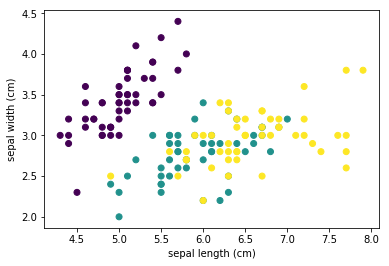

In [3]:
plt.scatter(dataset.data[:,0], dataset.data[:,1], c=dataset.target)
plt.ylabel('sepal width (cm)')
plt.xlabel('sepal length (cm)')
plt.legend
plt.show()

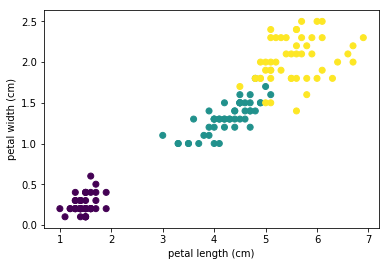

In [4]:
plt.scatter(dataset.data[:,2], dataset.data[:,3], c=dataset.target)
plt.ylabel('petal width (cm)')
plt.xlabel('petal length (cm)')
plt.show()

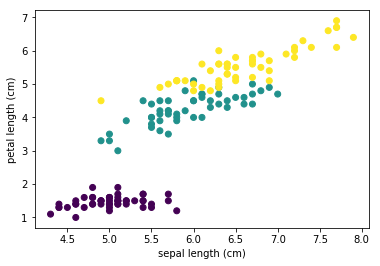

In [5]:
plt.scatter(dataset.data[:,0], dataset.data[:,2], c=dataset.target)
plt.ylabel('petal length (cm)')
plt.xlabel('sepal length (cm)')
plt.show()

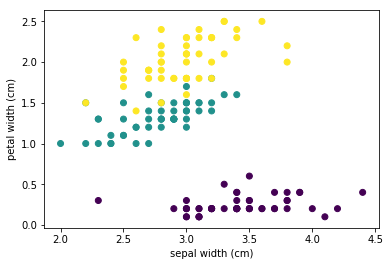

In [6]:
plt.scatter(dataset.data[:,1], dataset.data[:,3], c=dataset.target)
plt.ylabel('petal width (cm)')
plt.xlabel('sepal width (cm)')
plt.show()

We can see from the above plots that the "best" relation we can find is petal width vs petal length as datas are really splitted. We can also see that the split is easy for the 1st species (violet) as it is really separate from the other one (all models can perform perfectly for this one). The the split between yellow and green is a bit more delicate. Nevertheless it's more or less straight on both features. One other thing important to check is the correlation between features

In [7]:
corr_matrix = np.corrcoef(dataset.data[:,0], dataset.data[:,1])
print(corr_matrix)
corr_matrix = np.corrcoef(dataset.data[:,2], dataset.data[:,3])
print(corr_matrix)

[[ 1.         -0.10936925]
 [-0.10936925  1.        ]]
[[ 1.         0.9627571]
 [ 0.9627571  1.       ]]


This result confirm what we saw, the best correlation is between petal length and petal width.
Based on this visualisation we can assume that the best model / easier can be a tree classification. 
Linear/Polynomial Regression will be probably worse in the splitt yellow/green.
SVM with a kernel rbf can fit properly the model also but require more computing power.

In [8]:
tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(dataset.data[:,2:], dataset.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [9]:
export_graphviz(tree_clf, 
                out_file = None,
                feature_names = dataset.feature_names[2:],
                class_names=dataset.target_names
               )

'digraph Tree {\nnode [shape=box] ;\n0 [label="petal width (cm) <= 0.8\\ngini = 0.6667\\nsamples = 150\\nvalue = [50, 50, 50]\\nclass = setosa"] ;\n1 [label="gini = 0.0\\nsamples = 50\\nvalue = [50, 0, 0]\\nclass = setosa"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="petal width (cm) <= 1.75\\ngini = 0.5\\nsamples = 100\\nvalue = [0, 50, 50]\\nclass = versicolor"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="gini = 0.168\\nsamples = 54\\nvalue = [0, 49, 5]\\nclass = versicolor"] ;\n2 -> 3 ;\n4 [label="gini = 0.0425\\nsamples = 46\\nvalue = [0, 1, 45]\\nclass = virginica"] ;\n2 -> 4 ;\n}'

Apres conversion sur http://webgraphviz.com/

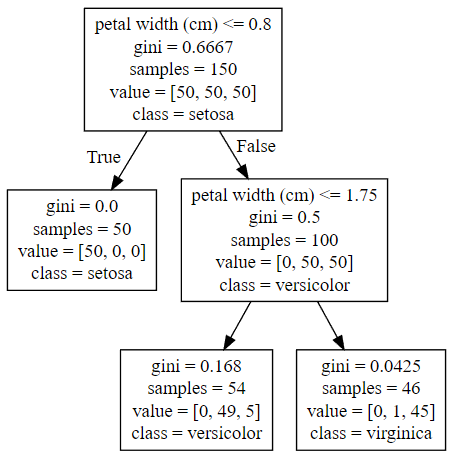

In [10]:
Image(filename='tree.png') 

We can see from this classifier that the precision is pretty good :
 - 0 non-setosa items have been classified as Setosa (0 FP)
 - 5 Virginica have been classified as Versicolor (5 FP, 1 TN)
 - 1 Versicolor have been classified as Virginica (1 FP, 5 TN)
 
Those 6 points are the 6 mixed ones in the 2nd graph (between Yellow and Green). As Setosa (violet) are really separated from other ones, there is no error which is logical. For this example where the split is easy, the Decision Tree Classifier is well suited and easy to understand afterward.
 
We can also test the model by point we determine on such a simple model

In [11]:
X = [[5.5, 2], [4.5, 1.5], [1.5, 0.4]]
print(tree_clf.predict(X))

[2 1 0]


The result is as expected if you plot them on the graph

[(5.5, 4.5, 1.5), (2, 1.5, 0.4)]


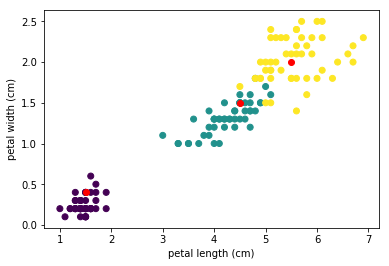

In [12]:
XY = list(zip(*X))
print(XY)
plt.scatter(dataset.data[:,2], dataset.data[:,3], c=dataset.target)
plt.scatter(XY[0], XY[1], c="red")
plt.ylabel('petal width (cm)')
plt.xlabel('petal length (cm)')
plt.show()

# Going further

For this example we can try to implement also a Perceptron able to detect if it's a particular species. Thet means, we can create 3 Perceptron to detect ano of them everytimes but we can directly run a MultiLayerPerceptron which do nearly the same as it merge them

In [13]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(dataset.data[:,2:], dataset.target)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [14]:
print(clf.predict([[5.5, 2], [4.5, 1.5], [0.4, 1.5]]))

[2 1 0]


With this model closer to NN, we can see that the prediction is identical